In [1]:
import sys
import os
from pathlib import Path
from glob import glob


In [2]:
sys.path.append('..')

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
from experiments.eval_features import eval_features

In [5]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_RESULTS = os.path.join(PATH_ROOT, 'results', 'exp643896')
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'tuning')
if not os.path.exists(PATH_OUTPUT):
    os.makedirs(PATH_OUTPUT)

print(PATH_RESULTS)

/home/lukec/workspace/baard_v4/results/exp643896


In [6]:
def get_auc_df(output_filename, detector_name, data_name, attack_name, eps):
    path_df = os.path.join(PATH_OUTPUT, output_filename)
    if os.path.exists(path_df):
        return pd.read_csv(path_df)
    else:
        _detector_name = detector_name.split('_')[0]
        path_files = glob(os.path.join(
            PATH_RESULTS,
            data_name,
            detector_name,
            attack_name,
            f'{_detector_name}-*-{data_name}-{attack_name}-{eps}.pt'
        ))
        print(path_files[0])

        k_list = sorted([int(Path(f).stem.split('-')[1]) for f in path_files])
        print(len(k_list))

        files_adv = [f'{_detector_name}-{k}-{data_name}-{attack_name}-{eps}.pt' for k in k_list]
        files_clean = [f'{_detector_name}-{k}-{data_name}-{attack_name}-clean.pt' for k in k_list]

        path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

        df = pd.DataFrame()
        for file_clean, file_adv in zip(files_clean, files_adv):
            _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
            df = pd.concat([df, df_auc_tpr], ignore_index=True)
        df['k'] = k_list

        df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
        return df


<AxesSubplot: xlabel='k', ylabel='auc'>

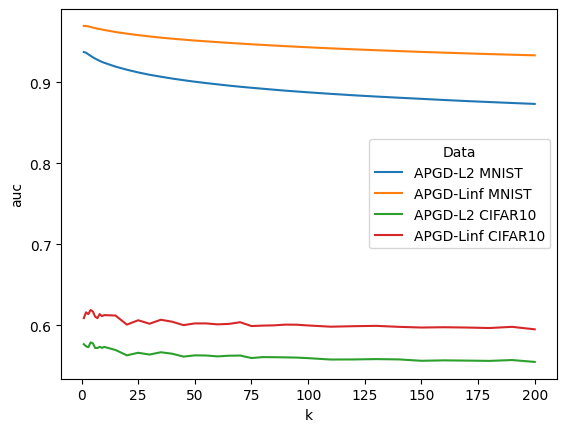

In [7]:
df_mnist_l2 = get_auc_df(
    'param_tuning_k_s2_mnist_l2.csv', 
    'ReliabilityStage_tuneK', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)

df_mnist_linf = get_auc_df(
    'param_tuning_k_s2_mnist_linf.csv', 
    'ReliabilityStage_tuneK', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)

df_cifar10_l2 = get_auc_df(
    'param_tuning_k_s2_cifar10_l2.csv',
    'ReliabilityStage_tuneK',
    'CIFAR10',
    'APGD-2',
    '0.3',
)

df_cifar10_linf = get_auc_df(
    'param_tuning_k_s2_cifar10_linf.csv',
    'ReliabilityStage_tuneK',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)
df_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df1 = pd.concat(
    [df_mnist_l2, df_mnist_linf, df_cifar10_l2, df_cifar10_linf], 
    ignore_index=True)
df1 = df1[['k', 'Data', 'auc']]

sn.lineplot(data=df1, x='k', y='auc', hue='Data')

## Get results for Stage 3

In [8]:
def get_auc_df(output_filename, detector_name, data_name, attack_name, eps):
    path_df = os.path.join(PATH_OUTPUT, output_filename)
    if os.path.exists(path_df):
        return pd.read_csv(path_df)
    else:
        _detector_name = detector_name.split('_')[0]
        path_files = glob(os.path.join(
            PATH_RESULTS,
            data_name,
            detector_name,
            attack_name,
            f'{_detector_name}-*-{data_name}-{attack_name}-{eps}.pt'
        ))
        print(path_files[0])

        k_list = sorted([int(Path(f).stem.split('-')[1]) for f in path_files])
        k_list = k_list[5:]
        print(len(k_list))

        files_adv = [f'{_detector_name}-{k}-{data_name}-{attack_name}-{eps}.pt' for k in k_list]
        files_clean = [f'{_detector_name}-{k}-{data_name}-{attack_name}-clean.pt' for k in k_list]

        path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

        df = pd.DataFrame()
        for file_clean, file_adv in zip(files_clean, files_adv):
            _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
            df = pd.concat([df, df_auc_tpr], ignore_index=True)
        df['k'] = k_list

        df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
        return df

<AxesSubplot: xlabel='k', ylabel='auc'>

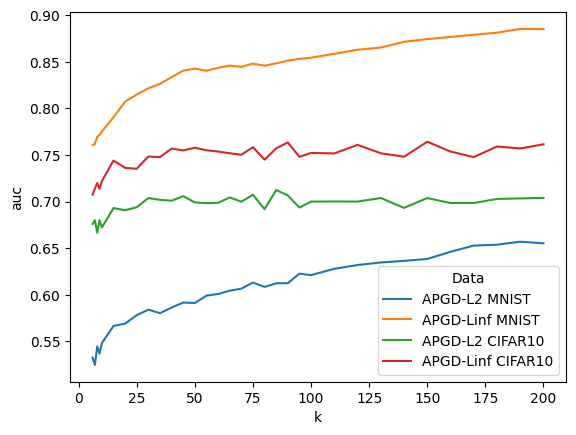

In [9]:
df_s3_mnist_l2 = get_auc_df(
    'param_tuning_k_s3_mnist_l2.csv', 
    'DecidabilityStage_tuneK', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_s3_mnist_linf = get_auc_df(
    'param_tuning_k_s3_mnist_linf.csv', 
    'DecidabilityStage_tuneK', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_s3_cifar10_l2 = get_auc_df(
    'param_tuning_k_s3_cifar10_l2.csv',
    'DecidabilityStage_tuneK',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_s3_cifar10_linf = get_auc_df(
    'param_tuning_k_s3_cifar10_linf.csv',
    'DecidabilityStage_tuneK',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)

df_s3_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_s3_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_s3_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_s3_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df2 = pd.concat(
    [df_s3_mnist_l2, df_s3_mnist_linf, df_s3_cifar10_l2, df_s3_cifar10_linf], 
    ignore_index=True)
df2 = df2[['k', 'Data', 'auc']]

sn.lineplot(data=df2, x='k', y='auc', hue='Data')

## Get DataFrame for Sample Size

In [10]:
def get_auc_df(output_filename, detector_name, data_name, attack_name, eps):
    path_df = os.path.join(PATH_OUTPUT, output_filename)
    if os.path.exists(path_df):
        return pd.read_csv(path_df)
    else:
        _detector_name = detector_name.split('_')[0]
        path_files = glob(os.path.join(
            PATH_RESULTS,
            data_name,
            detector_name,
            attack_name,
            f'{_detector_name}-*-{data_name}-{attack_name}-{eps}.pt'
        ))
        print(path_files[0])

        # SAMPLE_SIZE_LIST = np.concatenate([100, 500], np.arange(1000, 50000, 1000)).astype(int)
        SAMPLE_SIZE_LIST = np.arange(1000, 10001, 1000)
        print(len(SAMPLE_SIZE_LIST))

        files_adv = [f'{_detector_name}-{sample_size}-{data_name}-{attack_name}-{eps}.pt' for sample_size in SAMPLE_SIZE_LIST]
        files_clean = [f'{_detector_name}-{sample_size}-{data_name}-{attack_name}-clean.pt' for sample_size in SAMPLE_SIZE_LIST]

        path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

        df = pd.DataFrame()
        for file_clean, file_adv in zip(files_clean, files_adv):
            _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
            df = pd.concat([df, df_auc_tpr], ignore_index=True)
        df['m'] = SAMPLE_SIZE_LIST

        if output_filename:
            df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
        return df

<AxesSubplot: xlabel='m', ylabel='auc'>

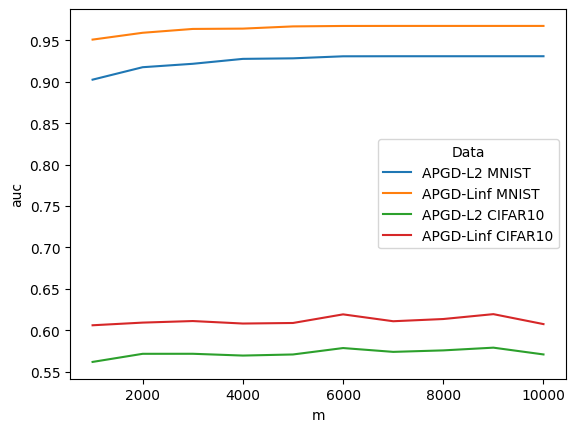

In [11]:
df_sample_size_s2_mnist_l2 = get_auc_df(
    'param_tuning_sample_size_s2_mnist_l2.csv', 
    'ReliabilityStage_tuneSampleSize', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_sample_size_s2_mnist_linf = get_auc_df(
    'param_tuning_sample_size_s2_mnist_linf.csv', 
    'ReliabilityStage_tuneSampleSize', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_sample_size_s2_cifar10_l2 = get_auc_df(
    'param_tuning_sample_size_s2_cifar10_l2.csv',
    'ReliabilityStage_tuneSampleSize',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_sample_size_s2_cifar10_linf = get_auc_df(
    'param_tuning_sample_size_s2_cifar10_linf.csv',
    'ReliabilityStage_tuneSampleSize',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)
df_sample_size_s2_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_sample_size_s2_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_sample_size_s2_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_sample_size_s2_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df3 = pd.concat(
    [df_sample_size_s2_mnist_l2, df_sample_size_s2_mnist_linf, df_sample_size_s2_cifar10_l2, df_sample_size_s2_cifar10_linf], 
    ignore_index=True)
df3 = df3[['m', 'Data', 'auc']]

sn.lineplot(data=df3, x='m', y='auc', hue='Data')

<AxesSubplot: xlabel='m', ylabel='auc'>

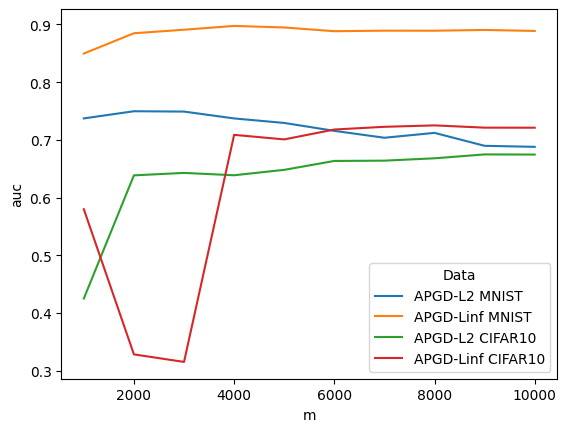

In [12]:
df_sample_size_s3_mnist_l2 = get_auc_df(
    'param_tuning_sample_size_s3_mnist_l2.csv', 
    'DecidabilityStage_tuneSampleSize', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_sample_size_s3_mnist_linf = get_auc_df(
    'param_tuning_sample_size_s3_mnist_linf.csv', 
    'DecidabilityStage_tuneSampleSize', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_sample_size_s3_cifar10_l2 = get_auc_df(
    'param_tuning_sample_size_s3_cifar10_l2.csv',
    'DecidabilityStage_tuneSampleSize',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_sample_size_s3_cifar10_linf = get_auc_df(
    'param_tuning_sample_size_s3_cifar10_linf.csv',
    'DecidabilityStage_tuneSampleSize',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)
df_sample_size_s3_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_sample_size_s3_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_sample_size_s3_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_sample_size_s3_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df4 = pd.concat(
    [df_sample_size_s3_mnist_l2, df_sample_size_s3_mnist_linf, df_sample_size_s3_cifar10_l2, df_sample_size_s3_cifar10_linf], 
    ignore_index=True)
df4 = df4[['m', 'Data', 'auc']]

sn.lineplot(data=df4, x='m', y='auc', hue='Data')

In [13]:
df1 = df1[df1['k'] <= 50]
df1 = df1[df1['k'] <= 150]
df3 = df3[df3['m'] <= 50000]
df4 = df4[df4['m'] <= 50000]


In [14]:
# AUC should alway greater than 0.5
df3['auc'] = df3['auc'].apply(lambda x: (1-x) if x < 0.5 else x)
df4['auc'] = df4['auc'].apply(lambda x: (1-x) if x < 0.5 else x)

In [15]:
ibm_color_palette = [
    '#6D88C4',
    '#6C63AC',
    '#F26322',
    '#DC257F',
    '#FCB017',
]
sn.color_palette(ibm_color_palette)

[(0.42745098039215684, 0.5333333333333333, 0.7686274509803922),
 (0.4235294117647059, 0.38823529411764707, 0.6745098039215687),
 (0.9490196078431372, 0.38823529411764707, 0.13333333333333333),
 (0.8627450980392157, 0.1450980392156863, 0.4980392156862745),
 (0.9882352941176471, 0.6901960784313725, 0.09019607843137255)]

In [16]:
df1['auc'] = df1['auc'] * 100
df2['auc'] = df2['auc'] * 100
df3['auc'] = df3['auc'] * 100
df4['auc'] = df4['auc'] * 100

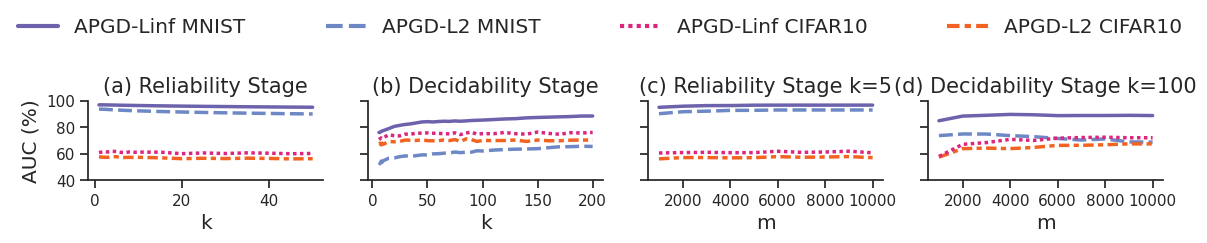

In [17]:
sn.set_theme(
    style='white',
    palette=ibm_color_palette,
)
sn.set_style('ticks')

FONTSIZE = 14.5

plt.rcParams['font.size'] = FONTSIZE
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(12, 2))

style_order = [
    'APGD-Linf MNIST',
    'APGD-L2 MNIST',
    'APGD-Linf CIFAR10',
    'APGD-L2 CIFAR10',
]

sn.lineplot(data=df1, x='k', y='auc', hue='Data', style='Data', ax=axs[0], linewidth=2.5, style_order=style_order)
sn.lineplot(data=df2, x='k', y='auc', hue='Data', style='Data', ax=axs[1], linewidth=2.5, style_order=style_order)
sn.lineplot(data=df3, x='m', y='auc', hue='Data', style='Data', ax=axs[2], linewidth=2.5, style_order=style_order)
sn.lineplot(data=df4, x='m', y='auc', hue='Data', style='Data', ax=axs[3], linewidth=2.5, style_order=style_order)
sn.despine(bottom=False, left=False)

titles = [
    '(a) Reliability Stage',
    '(b) Decidability Stage',
    '(c) Reliability Stage k=5',
    '(d) Decidability Stage k=100',
]
y_labels = [
    'k', 'k', 'm', 'm'
]
handles, labels = axs[-1].get_legend_handles_labels()
handles = [handles[1], handles[0], handles[3], handles[2]]
for h in handles:
    h.set_linewidth(3)
labels = [labels[1], labels[0], labels[3], labels[2]]
fig.legend(handles=handles, labels=labels, loc='lower left',
           bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=4, fontsize=FONTSIZE
           ).get_frame().set_linewidth(0)
axs[0].set_ylabel('AUC (%)', fontsize=FONTSIZE)
plt.yticks(np.linspace(40, 100, 4))
for i, title in enumerate(titles):
    axs[i].set_title(title, fontsize=FONTSIZE + 0.5)
    axs[i].get_legend().remove()
    axs[i].set_xlabel(y_labels[i], fontsize=FONTSIZE)
plt.tight_layout()
plt.savefig('param_tuning.pdf', dpi=300, bbox_inches='tight')
